In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.decomposition import PCA
import joblib
import warnings

In [1]:
!wget http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv

--2025-03-15 18:47:45--  http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 172.253.117.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7877383 (7.5M) [text/csv]
Saving to: ‘ecg.csv’

ecg.csv             100%[===================>]   7.51M  --.-KB/s    in 0.1s    

2025-03-15 18:47:45 (72.8 MB/s) - ‘ecg.csv’ saved [7877383/7877383]



In [3]:
df = pd.read_csv('ecg.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Dataset shape: (4997, 141)

First few rows:


,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


In [4]:
print("Summary statistics:")
df.describe()

Summary statistics:


,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
count,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,...,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000
mean,-0.262532,-1.649593,-2.492366,-3.119508,-3.167414,-2.866184,-2.272863,-1.797750,-1.409816,-0.935898,...,0.071168,-0.062821,-0.276300,-0.507968,-0.761527,-0.835386,-0.642892,-0.487950,-0.706754,0.583950
std,1.152563,1.445591,1.386477,1.302936,1.104513,0.906362,0.731666,0.622856,0.636923,0.657822,...,1.404529,1.646210,1.894644,2.059515,2.086289,2.056447,1.859564,1.831162,1.414498,0.492951
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004439,-2.701395,-3.667851,-4.227203,-4.007389,-3.480760,-2.779853,-2.165844,-1.773994,-1.362007,...,-1.088029,-1.588688,-2.147271,-2.731039,-3.031581,-2.868739,-2.155084,-1.658548,-1.596867,0.000000
50%,-0.297583,-1.661891,-2.585872,-3.388020,-3.468898,-2.946908,-2.285430,-1.750063,-1.422461,-0.910449,...,0.658234,0.717676,0.604723,0.333481,-0.030771,-0.202761,-0.194480,-0.160768,-0.568775,1.000000
75%,0.500057,-0.677702,-1.514058,-2.235425,-2.531019,-2.398789,-1.823473,-1.483699,-1.063533,-0.476386,...,1.169415,1.238671,1.264441,1.234413,1.034046,0.945220,0.951666,1.002628,0.271822,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


In [5]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum().sum())


Missing values per column:
0


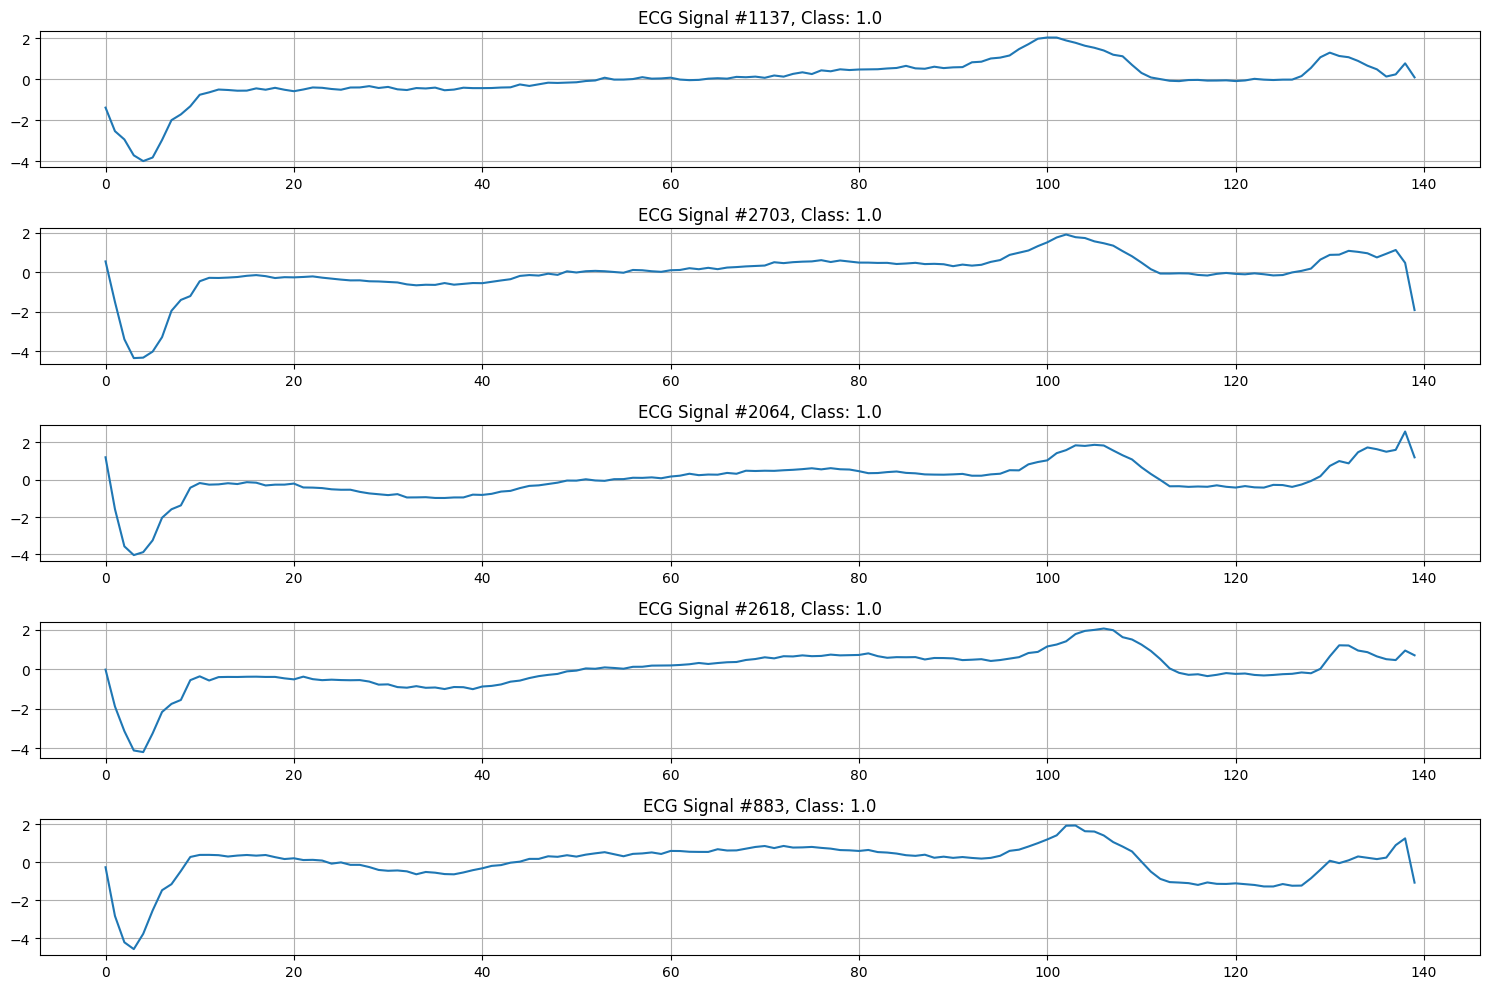

In [6]:
plt.figure(figsize=(15, 10))
sample_indices = np.random.choice(df.shape[0], 5, replace=False)

for i, idx in enumerate(sample_indices, 1):
    plt.subplot(5, 1, i)
    signal = df.iloc[idx, :-1].values  # Assume the last column is the class label
    plt.plot(signal)
    plt.title(f'ECG Signal #{idx}, Class: {df.iloc[idx, -1]}')
    plt.grid(True)

plt.tight_layout()
plt.show()

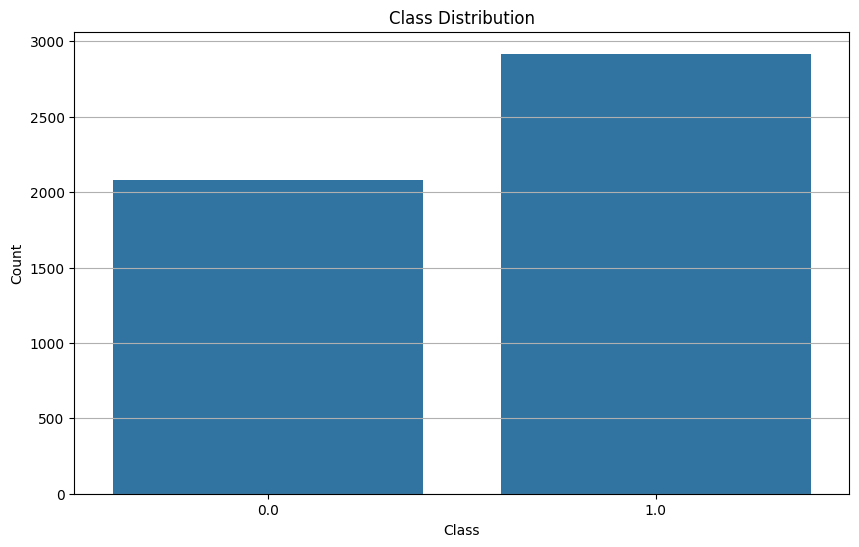

Class distribution:
1.0
1.0    2918
0.0    2079
Name: count, dtype: int64


In [7]:
plt.figure(figsize=(10, 6))
class_counts = df.iloc[:, -1].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()

print("Class distribution:")
print(class_counts)

In [8]:
# Separate features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (3747, 140)
Testing set shape: (1250, 140)


Logistic Regression Performance:
Accuracy: 0.9872
Precision: 0.9872
Recall: 0.9872
F1 Score: 0.9872


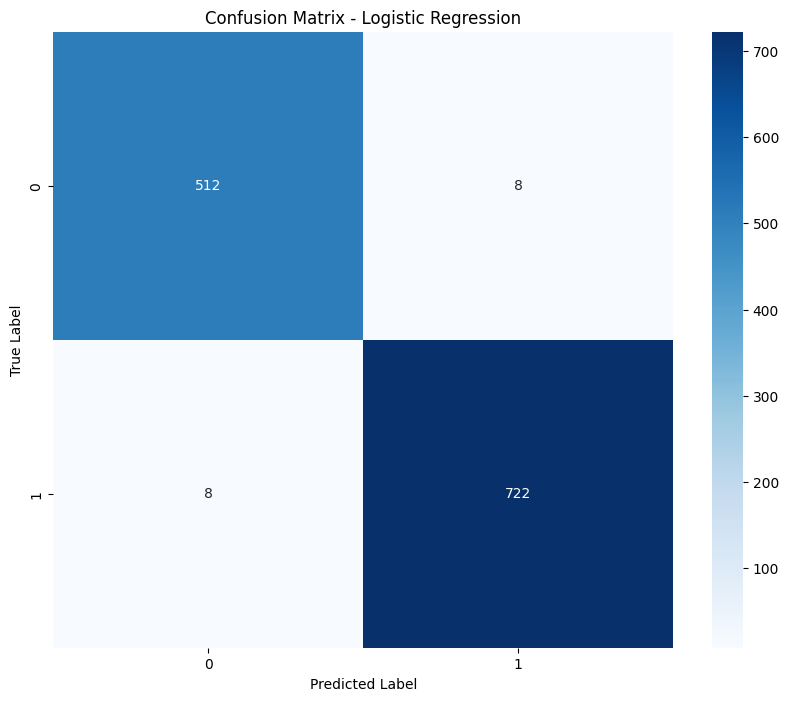

Logistic Regression model saved to 'logistic_regression_model.pkl'


In [9]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate model
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")

# Generate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Save the model
joblib.dump(lr_model, 'logistic_regression_model.pkl')
print("Logistic Regression model saved to 'logistic_regression_model.pkl'")

Random Forest Performance:
Accuracy: 0.9968
Precision: 0.9968
Recall: 0.9968
F1 Score: 0.9968


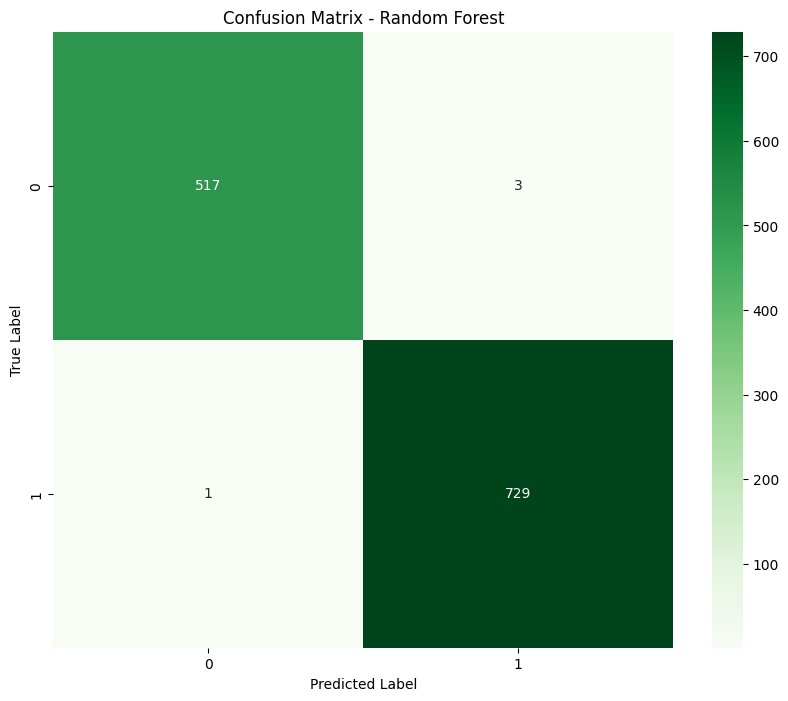

Random Forest model saved to 'random_forest_model.pkl'


In [10]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Random Forest model saved to 'random_forest_model.pkl'")

Support Vector Machine Performance:
Accuracy: 0.9944
Precision: 0.9944
Recall: 0.9944
F1 Score: 0.9944


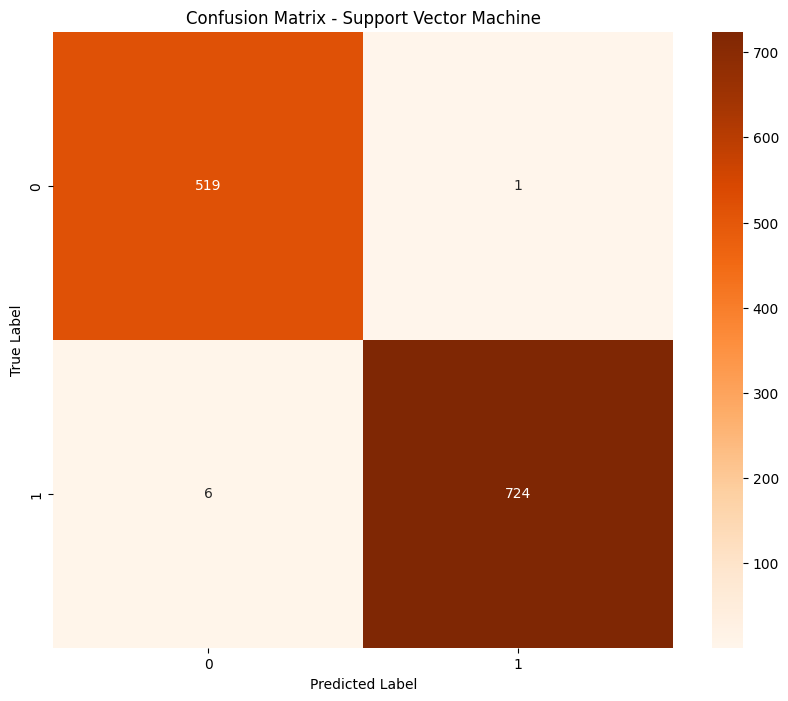

SVM model saved to 'svm_model.pkl'


In [11]:
# Train SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate model
print("Support Vector Machine Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm, average='weighted'):.4f}")

# Generate confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Save the model
joblib.dump(svm_model, 'svm_model.pkl')
print("SVM model saved to 'svm_model.pkl'")

Gradient Boosting Performance:
Accuracy: 0.9944
Precision: 0.9944
Recall: 0.9944
F1 Score: 0.9944


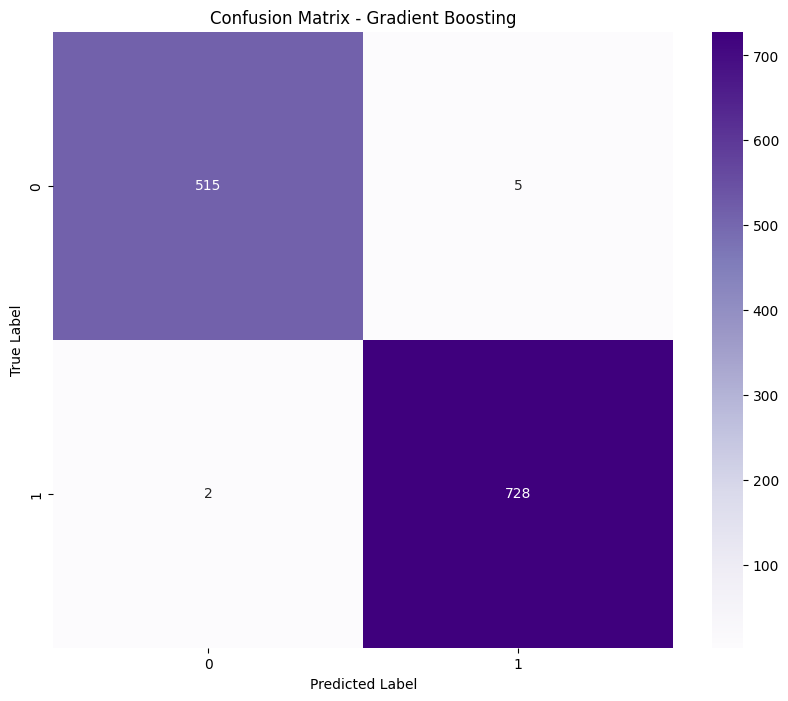

Gradient Boosting model saved to 'gradient_boosting_model.pkl'


In [12]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate model
print("Gradient Boosting Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gb, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gb, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_gb, average='weighted'):.4f}")

# Generate confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Save the model
joblib.dump(gb_model, 'gradient_boosting_model.pkl')
print("Gradient Boosting model saved to 'gradient_boosting_model.pkl'")

Neural Network Performance:
Accuracy: 0.9936
Precision: 0.9936
Recall: 0.9936
F1 Score: 0.9936


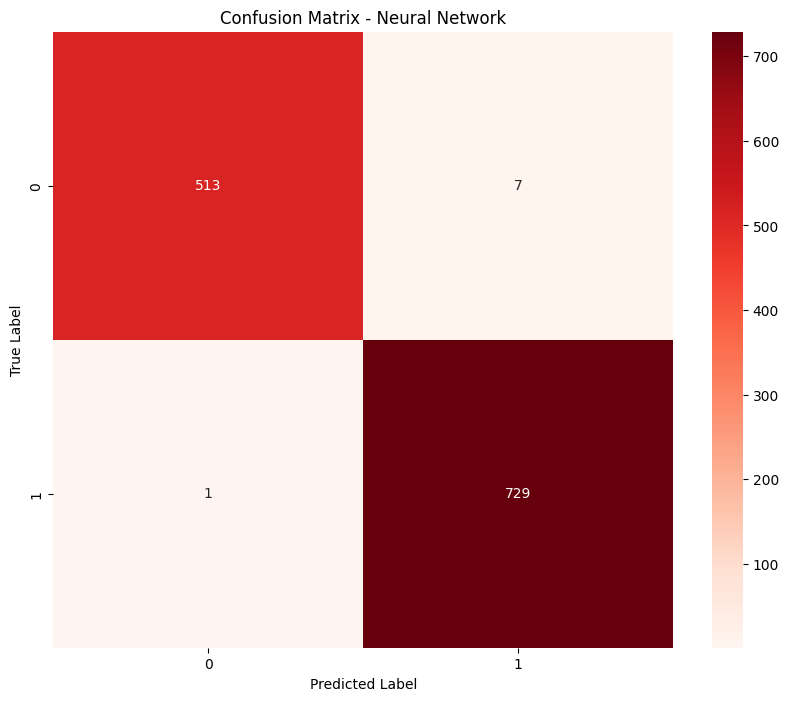

Neural Network model saved to 'neural_network_model.pkl'


In [14]:
# Train Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test)

# Evaluate model
print("Neural Network Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nn, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nn, average='weighted'):.4f}")

# Generate confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Save the model
joblib.dump(nn_model, 'neural_network_model.pkl')
print("Neural Network model saved to 'neural_network_model.pkl'")

In [15]:
# Create a dataframe to compare model performance
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Neural Network']
y_preds = [y_pred_lr, y_pred_rf, y_pred_svm, y_pred_gb, y_pred_nn]

# Calculate metrics
accuracies = [accuracy_score(y_test, pred) for pred in y_preds]
precisions = [precision_score(y_test, pred, average='weighted') for pred in y_preds]
recalls = [recall_score(y_test, pred, average='weighted') for pred in y_preds]
f1_scores = [f1_score(y_test, pred, average='weighted') for pred in y_preds]

# Create a DataFrame for comparison
performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

print("Model Performance Comparison:")
performance_df

Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.9872,0.987200,0.9872,0.987200
1,Random Forest,0.9968,0.996803,0.9968,0.996799
2,SVM,0.9944,0.994440,0.9944,0.994404
3,Gradient Boosting,0.9944,0.994407,0.9944,0.994398
4,Neural Network,0.9936,0.993636,0.9936,0.993595


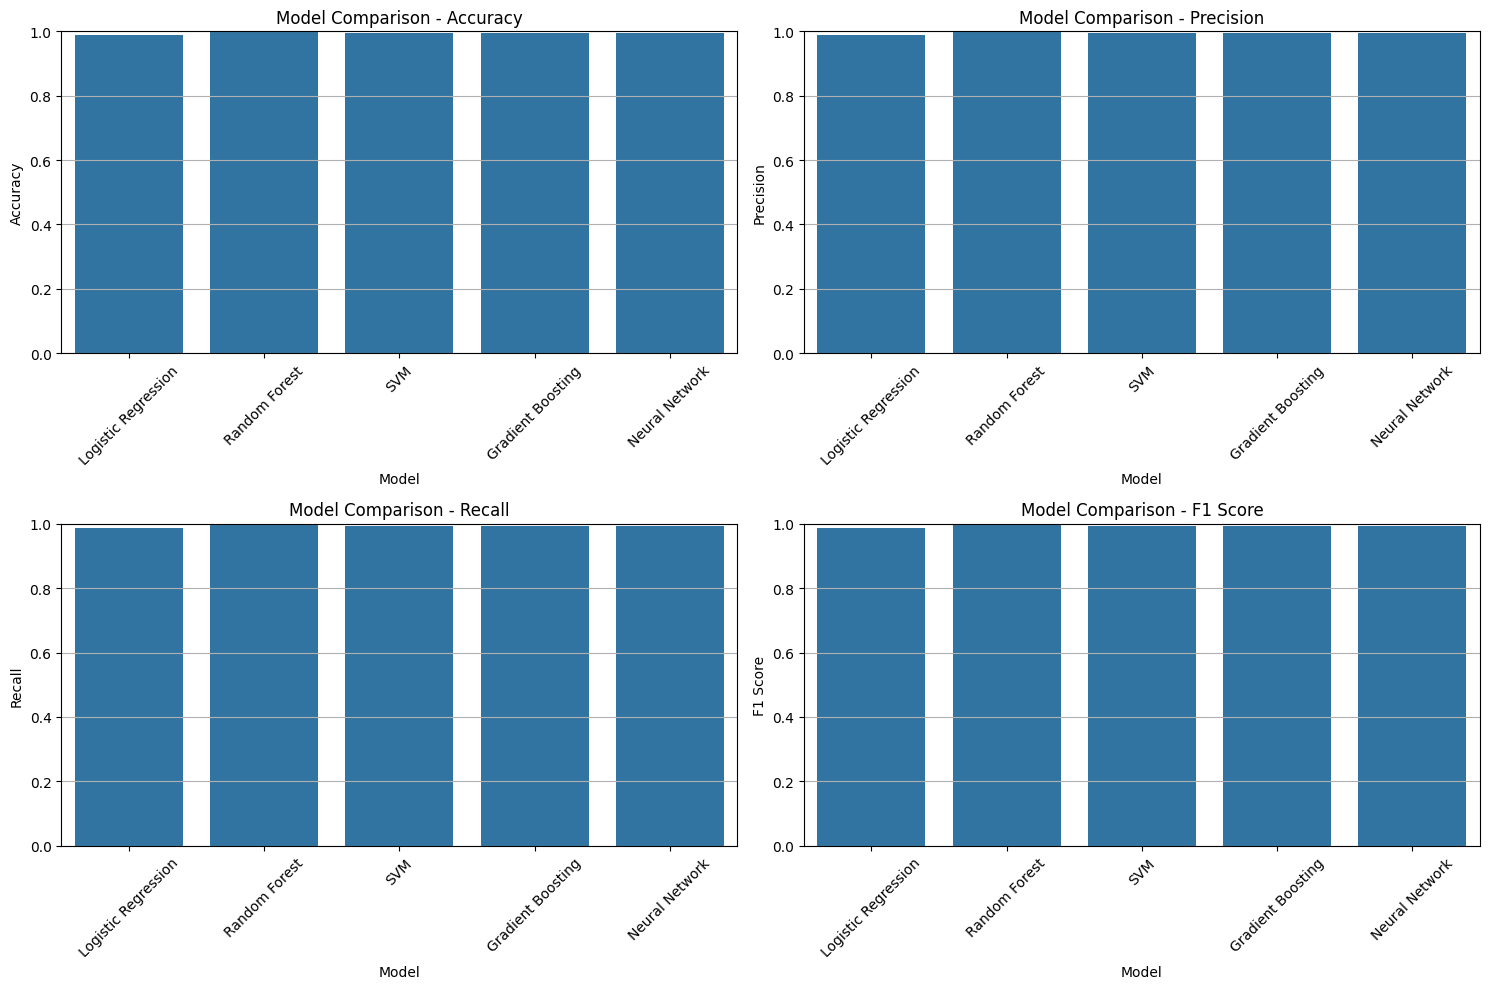

In [16]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Model', y=metric, data=performance_df)
    plt.title(f'Model Comparison - {metric}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

In [17]:
best_model_idx = np.argmax(accuracies)
best_model_name = models[best_model_idx]
print(f"Best performing model: {best_model_name}")

# Get the corresponding model
if best_model_name == 'Logistic Regression':
    best_model = lr_model
elif best_model_name == 'Random Forest':
    best_model = rf_model
elif best_model_name == 'SVM':
    best_model = svm_model
elif best_model_name == 'Gradient Boosting':
    best_model = gb_model
else:
    best_model = nn_model

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X_scaled, y, cv=cv, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

Best performing model: Random Forest
Cross-Validation Scores: [0.996      0.991      0.99299299 0.98898899 0.99199199]
Mean CV Accuracy: 0.9922
Standard Deviation: 0.0023
